In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Product data
data = {
    "Product": ["Laptop", "Mobile", "Tablet", "Headphones", "Smartwatch"],
    "Units_Sold": [120, 300, 150, 200, 180],
    "Revenue": [120000, 150000, 60000, 40000, 90000],
    "Cost": [90000, 100000, 45000, 30000, 60000],
    "Discount": [5000, 7000, 2000, 1000, 3000]   # Example discount given
}

df = pd.DataFrame(data)

In [12]:
# Calculate Profit
df["Profit"] = df["Revenue"] - df["Cost"] - df["Discount"]
df["Profit_Margin"] = round(df["Profit"] / df["Revenue"] * 100, 2)

# Rank Products by Profit
df["Profit_Rank"] = df["Profit"].rank(ascending=False).astype(int)

df

,Product,Units_Sold,Revenue,Cost,Discount,Profit,Profit_Margin,Profit_Rank
0,Laptop,120,120000,90000,5000,25000,20.83,3
1,Mobile,300,150000,100000,7000,43000,28.67,1
2,Tablet,150,60000,45000,2000,13000,21.67,4
3,Headphones,200,40000,30000,1000,9000,22.50,5
4,Smartwatch,180,90000,60000,3000,27000,30.00,2


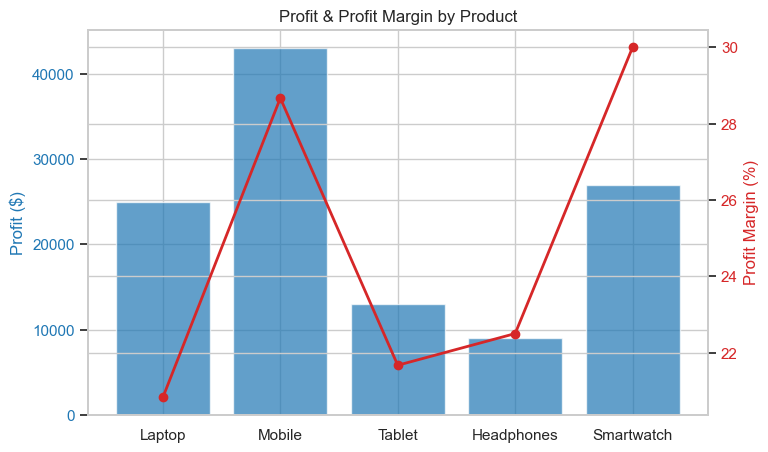

In [13]:
x = df["Product"]
profit = df["Profit"]
margin = df["Profit_Margin"]

fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:blue'
ax1.bar(x, profit, color=color, alpha=0.7)
ax1.set_ylabel('Profit ($)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(x, margin, color=color, marker='o', linewidth=2)
ax2.set_ylabel('Profit Margin (%)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Profit & Profit Margin by Product")
plt.show()


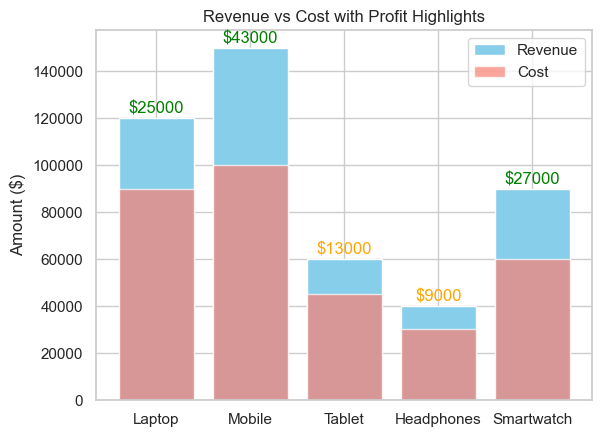

In [14]:
colors = ['green' if p>20000 else 'orange' for p in df['Profit']]
plt.bar(df['Product'], df['Revenue'], color='skyblue', label='Revenue')
plt.bar(df['Product'], df['Cost'], color='salmon', alpha=0.7, label='Cost')
for i, p in enumerate(df['Profit']):
    plt.text(i, df['Revenue'][i]+2000, f"${p}", ha='center', color=colors[i])
plt.title("Revenue vs Cost with Profit Highlights")
plt.ylabel("Amount ($)")
plt.legend()
plt.show()


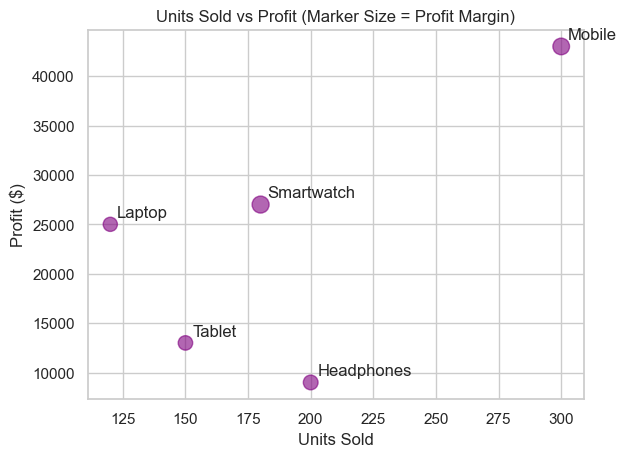

In [15]:
sizes = df["Profit_Margin"]*5  # scale marker size by profit margin

plt.scatter(df["Units_Sold"], df["Profit"], s=sizes, color='purple', alpha=0.6)
for i, txt in enumerate(df["Product"]):
    plt.annotate(txt, (df["Units_Sold"][i], df["Profit"][i]), xytext=(5,5), textcoords="offset points")
plt.title("Units Sold vs Profit (Marker Size = Profit Margin)")
plt.xlabel("Units Sold")
plt.ylabel("Profit ($)")
plt.show()


## Key Insights

- **Laptop & Mobile** are top performers in both profit and margin (Profit Rank 1 & 2).  
- **Tablet** has moderate sales but lower profit; consider pricing strategy or cost reduction.  
- **Headphones** have low margin; may need discounts review or bundle promotions.  
- **Smartwatch** is efficient (high margin) but lower total profit; increasing units sold could boost profit.  
- **Discount impact**: Even small discounts reduce profit noticeably; monitor carefully.
